[['10100111' '10000101' '01101111']
 ['10010000' '10001100' '10000111']
 ['10011111' '10011010' '10010100']]


<Figure size 1200x800 with 0 Axes>

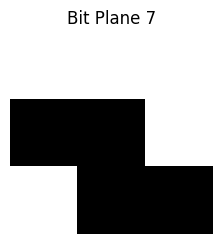

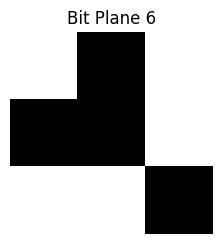

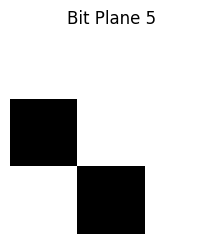

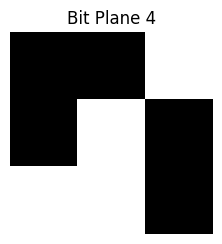

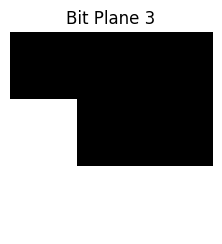

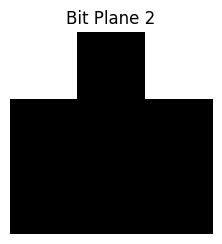

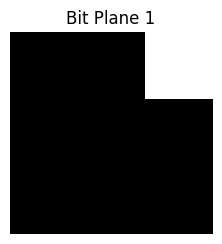

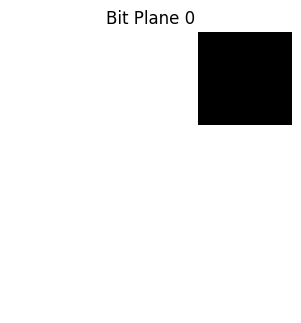

In [39]:
#bit plane slicing


import numpy as np
import matplotlib.pyplot as plt


# Input image as a numpy array
image = np.array([[167, 133, 111],
                  [144, 140, 135],
                  [159, 154, 148]], dtype=np.uint8)

# Function to convert a single pixel value to an 8-bit binary string using division by powers of 2
def convert_to_binary(pixel_value):
    binary_str = ''
    for i in range(7, -1, -1):  # Loop from bit 7 to bit 0
        # Check if the bit at position i is 1 or 0
        bit = (pixel_value // (2 ** i)) % 2
        binary_str += str(bit)
    return binary_str


def convertImageInBinary(image):
    binary_image = []

    # Iterate through each row of the image
    for row in image:
        # Create a new list for the current row
        binary_row = []
        # Iterate through each pixel in the row
        for pixel in row:
            # Convert the pixel to binary and add it to the row
            binary_pixel = convert_to_binary(pixel)
            binary_row.append(binary_pixel)
        # Add the binary row to the binary image
        binary_image.append(binary_row)

    return np.array(binary_image)

def bit_plane_slicing(image):
    # Create a list to store the bit planes
    bit_planes = []

    # Iterate through each bit (from 7 to 0, i.e., MSB to LSB)
    for bit in range(8):
        # Calculate the divisor (2^bit)
        divisor = 2 ** bit

        # Initialize a new array to store the bit plane (with 0 or 1)
        bit_plane = np.zeros(image.shape, dtype=np.uint8)

        # Extract each bit from the binary image
        for i in range(image.shape[0]):  # Iterate over rows
            for j in range(image.shape[1]):  # Iterate over columns
                # Integer division to shift the bits and modulo to extract the bit
                bit_value = (image[i, j] // divisor) % 2

                # Convert bit value from binary (0 or 1) to 255 for visibility
                if bit_value == 1:
                    bit_plane[i, j] = 255

        # Append the bit plane to the list
        bit_planes.append(bit_plane)

    return bit_planes


def plotImg(img, i):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 4,  i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Bit Plane {7 - i}')
    plt.axis('off')


binary_image_presentation = convertImageInBinary(image)

print(binary_image_presentation)

bit_planes_arr = bit_plane_slicing(image)

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(8):
    plotImg(bit_planes_arr[i], i)

plt.tight_layout()
plt.show()



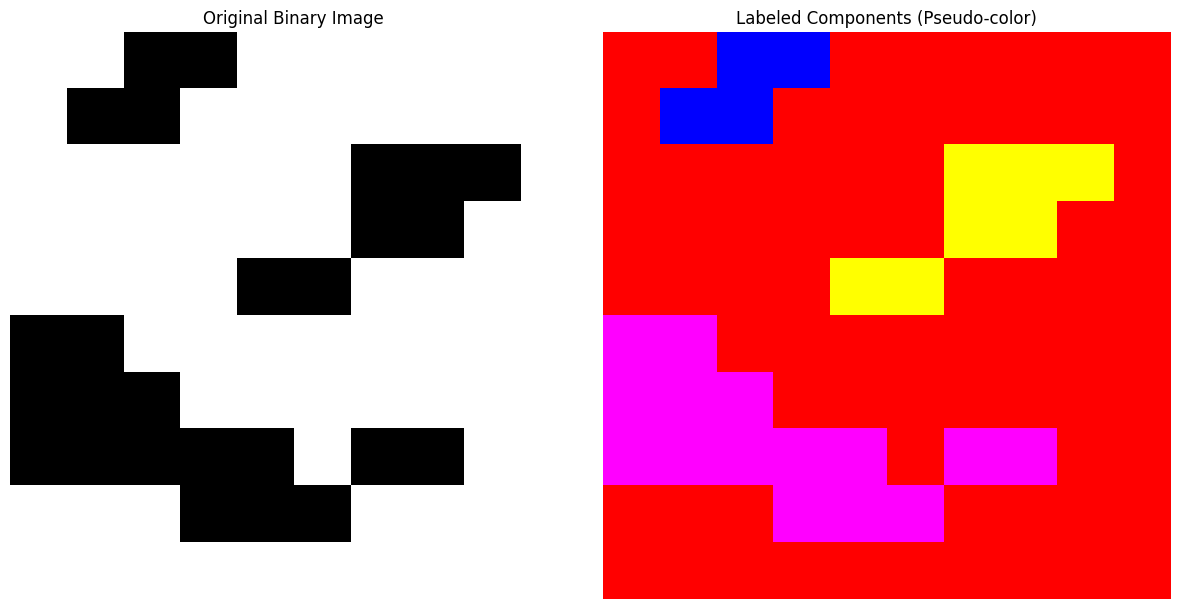

In [1]:
# connected component

import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, color

# Sample binary image (0 for region and 255 for background)
image = np.array([
    [255, 255, 0, 0, 255, 255, 255, 255, 255, 255],
    [255, 0, 0, 255, 255, 255, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 0, 0, 0, 255],
    [255, 255, 255, 255, 255, 255, 0, 0, 255, 255],
    [255, 255, 255, 255, 0, 0, 255, 255, 255, 255],
    [0, 0, 255, 255, 255, 255, 255, 255, 255, 255],
    [0, 0, 0, 255, 255, 255, 255, 255, 255, 255],
    [0, 0, 0, 0, 0, 255, 0, 0, 255, 255],
    [255, 255, 255, 0, 0, 0, 255, 255, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
])


# connected components labeling is done on regions with value 0 (black region).
# connectivity=2 for 8-connected components (horizontal, vertical, or diagonal neighbors).
label_image = measure.label(image == 0, connectivity=2)

# add colors with labels
labeled_image = color.label2rgb(label_image, bg_label=255)

#Original image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Binary Image")
ax[0].axis('off')

# Labeled image 
ax[1].imshow(labeled_image)
ax[1].set_title("Labeled Components (Pseudo-color)")
ax[1].axis('off')

plt.tight_layout()
plt.show()
